In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tools
import schottky as sch

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature

squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature

In [24]:
# Constantes et tableaux

k = 1.380649e-23
delta = 2.9461005*k*2.4
temp = np.arange(0, 10, 1e-3)


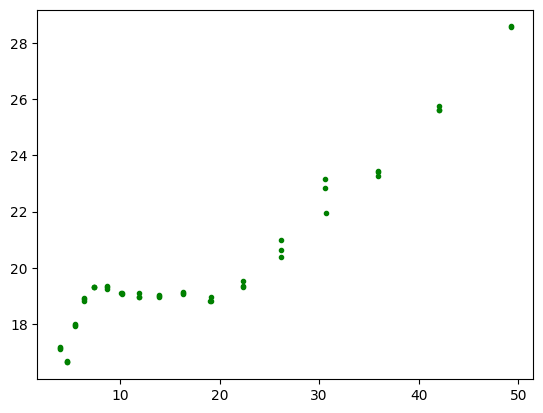

In [25]:
plt.figure()
plt.plot(squared_temperature[0:50], C_div_T[0:50], ".g")
plt.show()

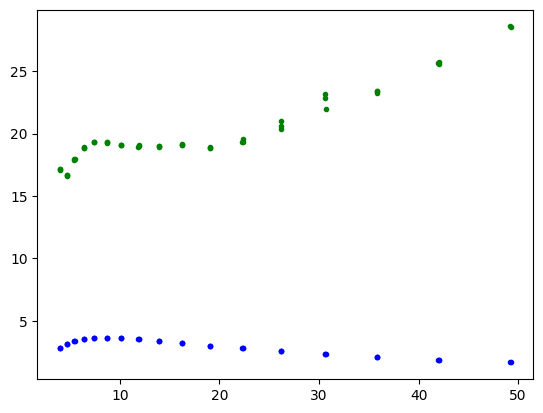

In [26]:
E = 2.4*k*np.sqrt(sch.max_schottky(squared_temperature, C_div_T, 0, 16)[0])

plt.figure()
plt.plot(squared_temperature[0:50], C_div_T[0:50], ".g")        
plt.plot(squared_temperature[0:50], sch.schottky(temperature[0:50], E), ".b")

In [27]:
# Soustraction de HC par schottky

HC_sample_substracted = sample_HC - sch.schottky(temperature, E)
